### 다차원 척도법(Multidimensional Scaling)

## 1. 의미
- 개체들을 대상으로 변수들 측정한 후에 유사성/비유사성 측정하여 개체들을 2차원 또는 3차원 공간상에 점으로 표현하는 분석 방법

- 객체간 근접성을 시각화하는 통계기법

## 2. 목적

- 데이터에 잠재되어 있는 패턴 구조를 찾아낸다.(소수 차원의 공간에 기하학적으로 표현)
- 데이터 축소의 목적으로 이용하기도 한다.
- 현상이나 과정에 고유의 구조로서 의미를 부여

## 3.방법

- 유클리드 거리 계산으로 개체들의 거리를 계산한다.
- 상대적 거리의 정확도를 높이기 위해 적합 정도를 스트레스 값으로 나타낸다.
- STRESS 값 : $S = \sqrt{\frac{\sum_{i=1,j=1}^n (d_{ij} - \hat d_{ij})^2}{\sum_{i=1,j=1}^n(d_{ij})^2}}$

- $d_{ij}$ = 관측대상 i부터 j까지 거리
- $\hat d_{ij}$ = 프로그램에 의해서 추정된 거리

STRESS|적합도수준
------|------
0|완벽(Perfect)
0.05이내|매우 좋은(Excellent)
0.05~0.10|만족(Satisfactory)
0.10~0.15|보통(Acceptable)
0.15이상|나쁨(Poor)

## 4. 계량적 MDS & 비계량적 MDS

### 1) 계량적 MDS

- 데이터가 구간척도이거나 비율척도인 경우 활용한다.(전통적인 MDS)
- N개의 케이스에 대해서 p개의 특성변수가 있는 경우 각 개체들간의 유클리드 거리행렬을 계산하고 개체들간의 비유사성 S를 공간상에 표현

In [1]:
from sklearn.manifold import MDS,mds
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.spatial import distance
from sklearn.metrics.pairwise import manhattan_distances,euclidean_distances

C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.manifold.mds module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
eurodist = pd.read_csv('eurodist.csv',index_col=0)

In [4]:
mds = MDS(n_components=2,dissimilarity='precomputed')

In [5]:
coords = mds.fit_transform(eurodist.values)
results = mds.fit(eurodist.values)

In [42]:
def stress_value(data,stress) :
    Kruskal_stress = np.sqrt(stress / (0.5 * np.sum(data.values**2)))
    print("Stress : {}".format(Kruskal_stress))

In [43]:
stress_value(eurodist,mds.stress_)

Stress : 0.07216185443615533


- 0.07이므로 만족한다

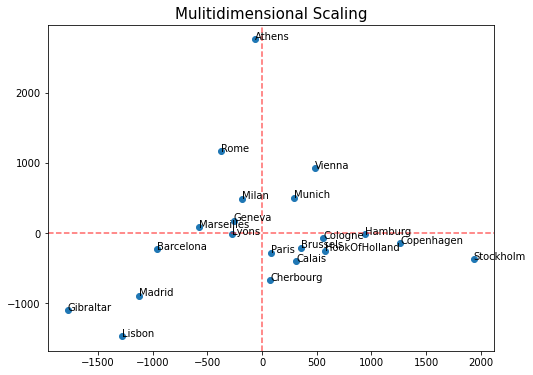

In [57]:
mds = MDS(2, dissimilarity='precomputed',random_state=1)
coords = mds.fit_transform(eurodist.values)
x, y = coords[:, 0], coords[:, 1]

fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(x, y)
for (city, _x, _y) in zip(eurodist.columns.tolist(), x, y):
    ax.annotate(city, (_x, _y))
plt.title('Mulitidimensional Scaling',fontsize = 15)
plt.axvline(0,color = 'red',linestyle = '--',alpha = 0.6)
plt.axhline(0,color = 'red',linestyle = '--',alpha = 0.6)   
plt.show()

#### (1) MDS parameter 정리


- n_components : 차원의 수 결정
- metric : **True면 계량적, False면 비계량적**
- n_init : 수를 조정하여 stress 값 최소화 시킬 수 있다.
- max_iter : 최대 반복 횟수
- verbose : 
- eps : 
- dissimilarity : default값은 euclidean,pre-computed

#### (2) Atrributes

- embedding_ : 임베딩 값
- stress_ : 최종 스트레스 값
- dissimilarity_matrix_ : 두 점 사이의 거리
- n_iter_ : 최적의 스트레스값에 대응하는 반복 횟수 값 알려줌

### 2) 비계량적 MDS

- 데이터가 순서척도인 경우에 활용한다.
- 개체들간의 거리가 순서로 주어진 경우에는 순서척도를 거리의 속성과 같도록 변환하여 거리를 생성한 후 변환

In [59]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

In [60]:
swiss = r['swiss']

In [61]:
swiss2 = swiss.iloc[:,1:]

- 거리행렬 데이터가 아니므로 거리를 계산

In [62]:
swiss_dist = pd.DataFrame(columns=swiss2.index,index=swiss2.index)

In [63]:
value = []
index_list = []
for i in range(len(swiss_dist)) :
    for a in range(len(swiss_dist)) :
        value.append(distance.euclidean(swiss2.loc[swiss_dist.index[i]],swiss2.loc[swiss_dist.columns[a]]))
        index_list.append((swiss_dist.index[i],swiss_dist.columns[a]))

In [64]:
for i in range(1,48):
    swiss_dist.iloc[:,i-1] = value[47*(i-1):47*i]

In [65]:
isomds = MDS(n_components=2,metric=False,dissimilarity='euclidean')

In [66]:
isomds.fit(swiss_dist.values)

MDS(metric=False)

In [67]:
coords = isomds.fit_transform(swiss_dist.values)
results = isomds.fit(swiss_dist.values)

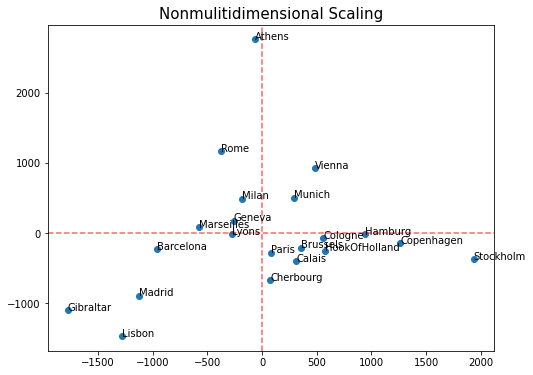

In [68]:
mds = MDS(2, dissimilarity='precomputed',random_state=1)
coords = mds.fit_transform(eurodist.values)
x, y = coords[:, 0], coords[:, 1]

fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(x, y)
for (city, _x, _y) in zip(eurodist.columns.tolist(), x, y):
    ax.annotate(city, (_x, _y))
plt.title('Nonmulitidimensional Scaling',fontsize = 15)
plt.axvline(0,color = 'red',linestyle = '--',alpha = 0.6)
plt.axhline(0,color = 'red',linestyle = '--',alpha = 0.6)   
plt.show()

In [70]:
stress_value(swiss_dist,isomds.stress_)

Stress : 0.0029716166948380897


- 거의 0에 가까우므로 완벽하다고 할 수 있다.